# Temporal Data Analysis - Projet

Elyes KHALFALLAH - 5230635

23 / 12 / 2024

---


In [1]:
# Imports utiles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1) Analyse préliminaire des données


### 1.1) Chargement et analyse des données


In [2]:
# Chargement des données
data = pd.read_csv("sunspot.csv")


In [3]:
# Avant de visualiser, faisons en sorte que la colonne 't' soit considérée comme une information temporelle
# 't' représente ici l'année. Nous allons donc la transformer en datetime pour un meilleur handling temporel.
# On considère le 1er janvier de l'année 't'.
data["t"] = pd.to_datetime(data["t"], format="%Y")

# Définir la colonne 't' comme index pour une meilleure manipulation des séries temporelles
data.set_index("t", inplace=True)


In [4]:
# Aperçu des premières lignes
print("Aperçu des premières lignes :")
data.head()


Aperçu des premières lignes :


,sunspot
t,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [5]:
# Informations générales sur le DataFrame
print("\nInformations sur le DataFrame :")
data.info()



Informations sur le DataFrame :
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 289 entries, 1700-01-01 to 1988-01-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sunspot  286 non-null    float64
dtypes: float64(1)
memory usage: 4.5 KB


In [6]:
# Statistiques descriptives sur la colonne sunspot
print("\nStatistiques descriptives sur la colonne 'sunspot' :")
data["sunspot"].describe()



Statistiques descriptives sur la colonne 'sunspot' :


count    286.000000
mean      47.801748
std       40.046048
min        1.000000
25%       13.900000
50%       37.700000
75%       68.700000
max      190.200000
Name: sunspot, dtype: float64

In [7]:
# Vérifier s'il y a des valeurs manquantes
print("\nNombre de valeurs manquantes par colonne :")
data.isnull().sum()



Nombre de valeurs manquantes par colonne :


sunspot    3
dtype: int64

In [8]:
# Afficher les valeurs 11, 12, et 110 du dataset
print("\nValeurs 11, 12, et 110 du dataset :")
data.iloc[[11, 12, 110]]



Valeurs 11, 12, et 110 du dataset :


,sunspot
t,
1711-01-01,NaN
1712-01-01,NaN
1810-01-01,NaN


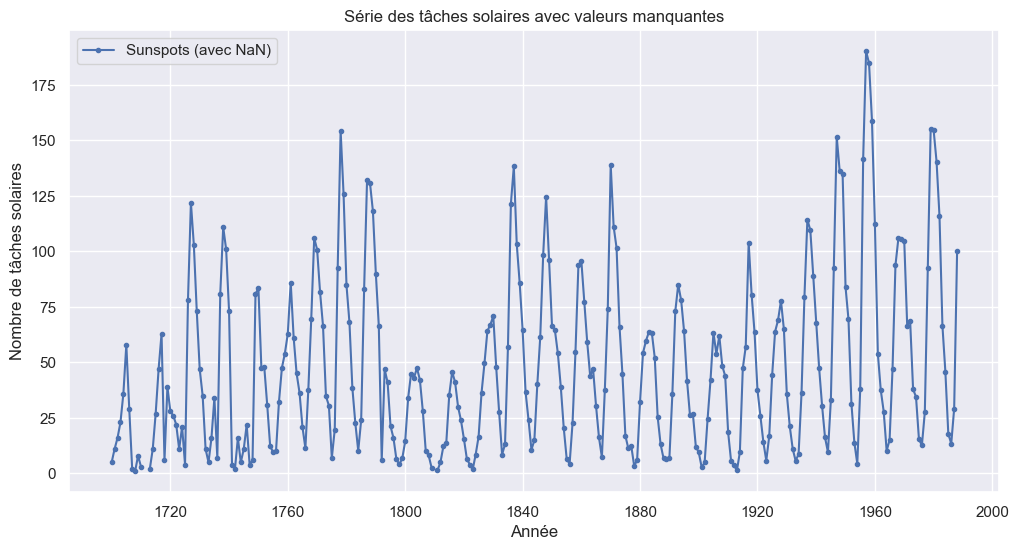

In [9]:
# Visualisation brute (avec valeurs manquantes)
sns.set()
plt.figure(figsize=(12, 6))
plt.plot(data["sunspot"], marker=".", linestyle="-", label="Sunspots (avec NaN)")
plt.title("Série des tâches solaires avec valeurs manquantes")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()


# Virons les valeurs aberrantes en utilisant la méthode de Winsorisation

### 1.2) Logarithme sur les valeurs existantes


In [10]:
# Prendre les valeurs log de la série
data_log = data.copy()
data_log["sunspot"] = round(np.log(data["sunspot"]), 1)

data_log.head()


,sunspot
t,
1700-01-01,1.6
1701-01-01,2.4
1702-01-01,2.8
1703-01-01,3.1
1704-01-01,3.6


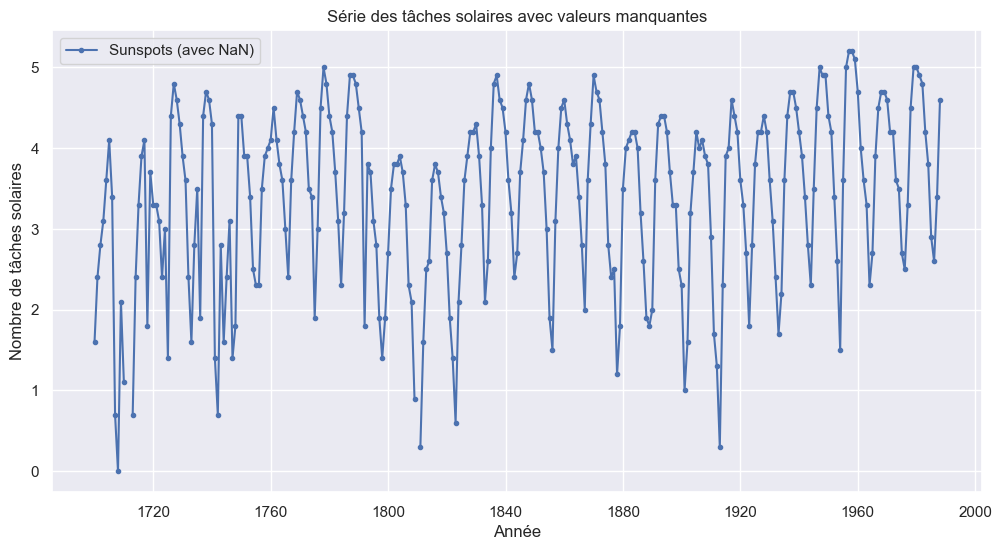

In [11]:
# Visualisation brute (avec valeurs manquantes)
sns.set()
plt.figure(figsize=(12, 6))
plt.plot(data_log["sunspot"], marker=".", linestyle="-", label="Sunspots (avec NaN)")
plt.title("Série des tâches solaires avec valeurs manquantes")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()


### 1.3) Interpolation linéaire pour completer les données manquantes


In [12]:
# Interpolation linéaire
data_log_interpolated = data_log.copy()

# Interpolation linéaire des valeurs manquantes arrondies au dixième
# comme toutes les autres valeurs du dataset
data_log_interpolated["sunspot"] = round(
    data_log_interpolated["sunspot"].interpolate(method="linear"), 1
)


In [13]:
# Vérifier s'il y a des valeurs manquantes
print("\nDonnées NaN manquantes après interpolation :")
print(data_log_interpolated.isnull().sum())

# Afficher les valeurs 11, 12, et 110 du dataset
print("\nValeurs 11, 12, et 110 du dataset :")
data_log_interpolated.iloc[[11, 12, 110]]



Données NaN manquantes après interpolation :
sunspot    0
dtype: int64

Valeurs 11, 12, et 110 du dataset :


,sunspot
t,
1711-01-01,1.0
1712-01-01,0.8
1810-01-01,0.6


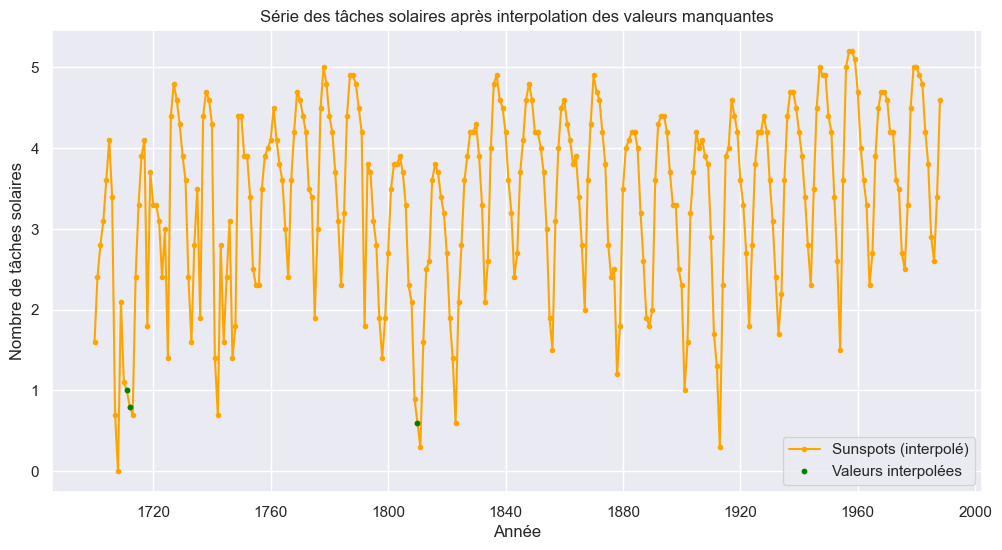

In [14]:
# Les années manquantes initialement
missing_years = [1711, 1712, 1810]
missing_years_dt = pd.to_datetime(missing_years, format="%Y")

# Visualisation après interpolation
sns.set()
plt.figure(figsize=(12, 6))

# On affiche la série temporelle avec les valeurs interpolées
plt.plot(
    data_log_interpolated["sunspot"],
    marker=".",
    linestyle="-",
    color="orange",
    label="Sunspots (interpolé)",
)

# On met en évidence les valeurs interpolées aux années manquantes en rouge
plt.scatter(
    missing_years_dt,
    data_log_interpolated.loc[missing_years_dt, "sunspot"],
    color="Green",
    s=10,
    zorder=5,
    label="Valeurs interpolées",
)

plt.title("Série des tâches solaires après interpolation des valeurs manquantes")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()


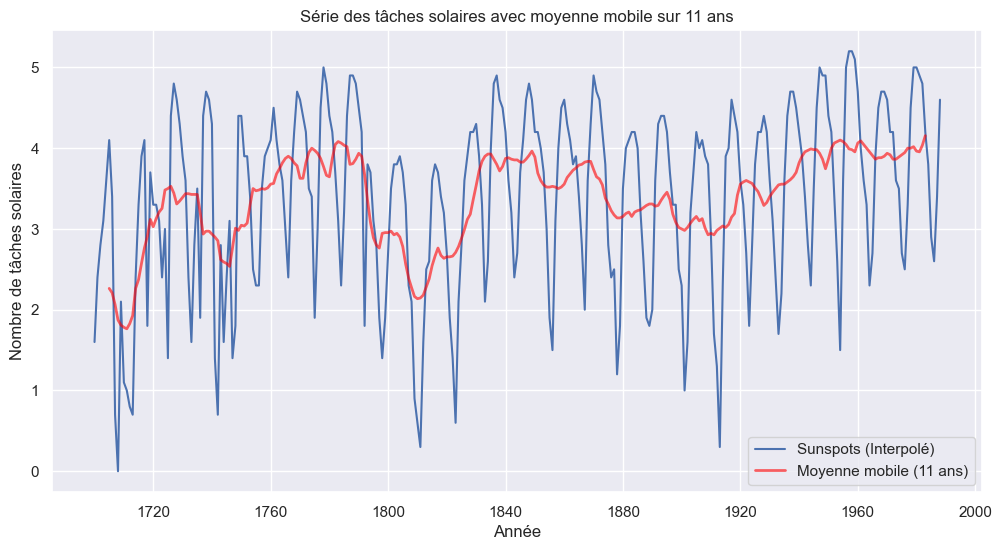

In [15]:
# On calcule une moyenne mobile (rolling mean) sur une fenêtre de 11 ans
data_log_interpolated["rolling_mean_11"] = (
    data_log_interpolated["sunspot"].rolling(window=11, center=True).mean()
)

# Tracé des données originales et de la moyenne mobile
plt.figure(figsize=(12, 6))
plt.plot(data_log_interpolated["sunspot"], alpha=1, label="Sunspots (Interpolé)")
plt.plot(
    data_log_interpolated["rolling_mean_11"],
    color="red",
    linewidth=2,
    label="Moyenne mobile (11 ans)",
    alpha=0.6,
)
plt.title("Série des tâches solaires avec moyenne mobile sur 11 ans")
plt.xlabel("Année")
plt.ylabel("Nombre de tâches solaires")
plt.legend()
plt.show()


---

## 2) Statistique Inférentielle


In [16]:
# Imports utiles
from statsmodels.tsa.seasonal import seasonal_decompose


### 2.1) Additif ou Multiplicatif ?

La question additive vs multiplicative se pose au moment de la décomposition des séries temporelles. Une décomposition classique (via `seasonal_decompose` dans statsmodels, par exemple) part du principe que la série peut être décomposée en trois composantes : tendance, saisonnalité et résidu. Ces composants peuvent s’agréger de façon additive ou multiplicative:

- Additive :
  La série est représentée comme : `Série(t) = Tendance(t) + Saison(t) + Résidu(t)`

Dans ce cas, la saisonnalité est à peu près constante en amplitude, quelle que soit la valeur de la tendance.

- Multiplictive :
  La série est représentée comme : `Série(t) = Tendance(t) * Saison(t) * Résidu(t)`

L’amplitude de la saisonnalité varie proportionnellement à la tendance. Par exemple, si la tendance augmente, les fluctuations saisonnières (le “creux” et le “pic” saisonnier) augmentent en intensité.

À la vue de la série, on constate que l’amplitude des variations semble dépendre du niveau général de la série. Lorsque le nombre moyen de tâches solaires est élevé, les pics et creux saisonniers (ou plutôt cycliques) sont plus marqués, alors que lorsque le nombre moyen est bas, la fluctuation l’est également. Ce comportement est typique d’un modèle multiplicatif.


### 2.2) Quel modèle choisir alors ?

La série des tâches solaires présente un comportement clairement cyclique, avec une périodicité d’environ 11 ans. Ce type de pattern ressemble à de la saisonnalité, bien que plus long qu’un cycle saisonnier typique (comme un cycle annuel ou mensuel). Ce comportement suggère qu’un simple modèle AR ou MA ne serait pas idéal car ces modèles ne gèrent pas directement la saisonnalité.

Nous pourrons utiliser au lieu un SARIMA, plus intéressant pour modéliser la saisonnalité grace à ses paramètres supplémentaires. Nous pourrons spécifier une saisonalité qui capture les cycles solaires observés.


### 2.3) Décomposition de la série en composants indépendants


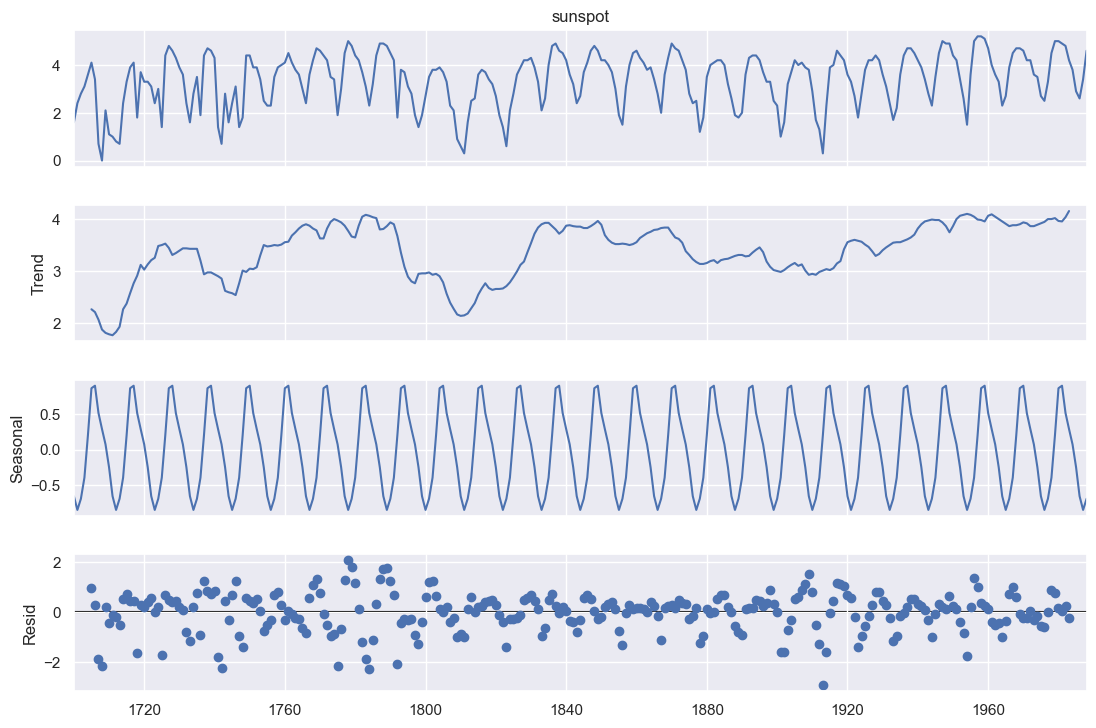

In [17]:
# Décomposition multiplicative
result = seasonal_decompose(
    data_log_interpolated["sunspot"], model="additive", period=11
)

# Affichage des composantes
fig = result.plot()
fig.set_size_inches(12, 8)
plt.show()


- La Trend révèle l'évolution à long terme du niveau moyen des taches solaites. Elle fluctue sur plusieures décennies, montrant des périodes où l'activité est plus ou moins forte.
- Nous avons un motif très régulier en saisonnalité, celui-ci se rapprochant à la durée d'un cycle solaire (environ 11.2 ans d'après Google).
- Le Résid est ce qui reste quand on retire la saisonnalité et la tendance.


### 2.4) SARIMA

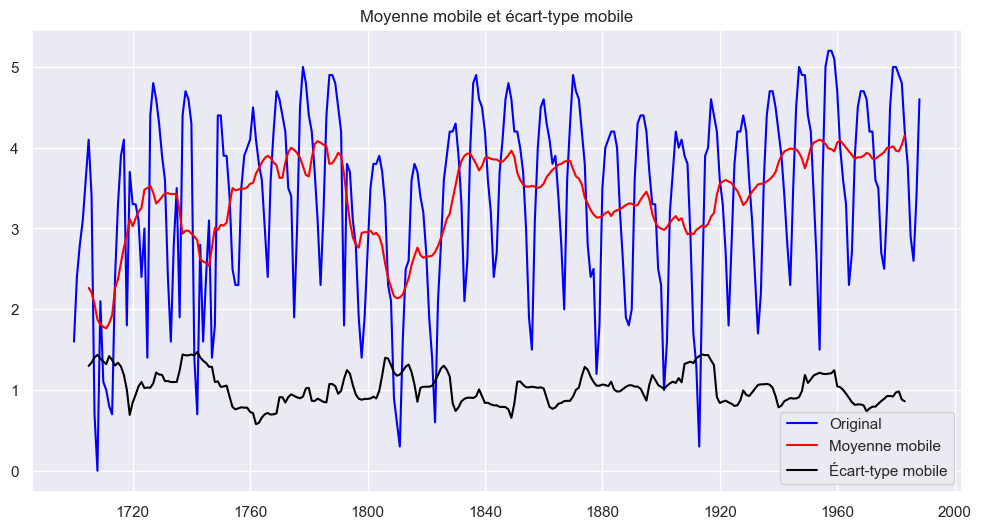

Résultats du test de Dickey-Fuller :
Test Statistic                  -2.911713
p-value                          0.044003
#Lags Used                      11.000000
Number of Observations Used    277.000000
Critical Value (1%)             -3.454180
Critical Value (5%)             -2.872031
Critical Value (10%)            -2.572360
dtype: float64


In [18]:
# Appliquons un test de Dickey-Fuller augmenté (ADF) pour tester la stationnarité
from statsmodels.tsa.stattools import adfuller

# Fonction pour tester la stationnarité
def test_stationarity(timeseries):
    # Calcul de la moyenne mobile
    rolmean = timeseries.rolling(window=11, center=True).mean()
    rolstd = timeseries.rolling(window=11, center=True).std()

    # Tracé des statistiques mobiles
    plt.figure(figsize=(12, 6))
    plt.plot(timeseries, color="blue", label="Original")
    plt.plot(rolmean, color="red", label="Moyenne mobile")
    plt.plot(rolstd, color="black", label="Écart-type mobile")
    plt.legend(loc="best")
    plt.title("Moyenne mobile et écart-type mobile")
    plt.show()

    # Test de Dickey-Fuller
    print("Résultats du test de Dickey-Fuller :")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

# Test de stationnarité
test_stationarity(data_log_interpolated["sunspot"])
